# Principal Components Analysis

In this notebook we'll explore the use of PCA for various types of data.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Load yeast gene expression data and center or standardize it:

In [29]:
data = np.loadtxt("yeast.data", delimiter = ",")
y=data[:,0]
# the data has a bunch of examples whose functional class 
# is unkown.  we'll discard those:
X=data[y>=0,1:]
y=y[y>=0]
scaler = StandardScaler(with_std=False).fit(X)
X = scaler.transform(X)
X.shape

(227, 79)

Let's apply PCA to the data and keep the first 20 principal components:

In [47]:
num_components = 20
pca = PCA(n_components=num_components)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(227, 20)

In [ ]:
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_, 'ob')
plt.xlabel("component")
plt.xticks(range(1,num_components+1, 2))
plt.ylabel("fraction of explained variance");

Now, let's visualize the first two principal components:

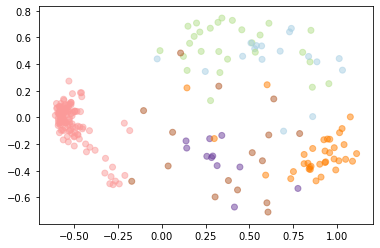

In [34]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5, c=y, cmap=plt.cm.Paired);

Let's take a look at the next two principal components:

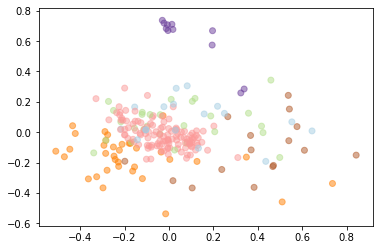

In [28]:
plt.scatter(X_reduced[:, 2], X_reduced[:, 3], alpha=0.5, c=y, cmap=plt.cm.Paired);

Let's go higher:

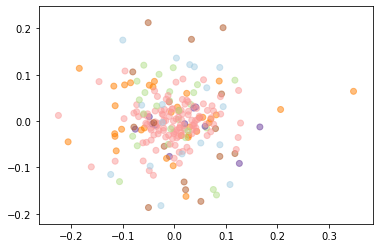

In [27]:
plt.scatter(X_reduced[:, 18], X_reduced[:, 19], alpha=0.5, c=y, cmap=plt.cm.Paired);

PCA wasn't specifically designed to provide a low dimensional representation of the data.
Next, let's apply the t-SNE method:

In [37]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

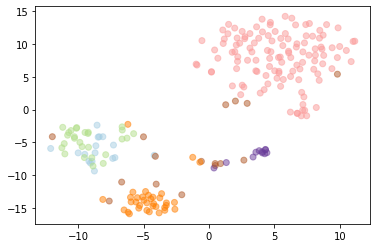

In [38]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.5, c=y, cmap=plt.cm.Paired);

To show you that this behavior of PCA is not unique to this dataset, let's use one of the datasets provided with scikit-learn:

In [48]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
scaler = StandardScaler(with_std=False).fit(X)
X = scaler.transform(X)
X.shape

(1797, 64)

In [49]:
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X)

print (pca.explained_variance_ratio_)
X_reduced.shape

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.0237234  0.02272696
 0.01821862 0.01773853 0.01467096 0.01409713 0.01318581 0.01248136
 0.01017675 0.00904955]


(1797, 20)

Now, let's visualize the first two principal components:

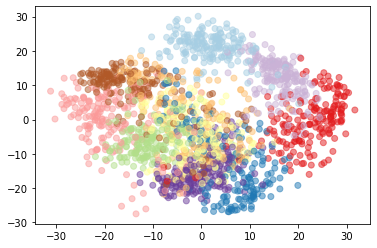

In [50]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5, c=y, cmap=plt.cm.Paired);

And using t-SNE:

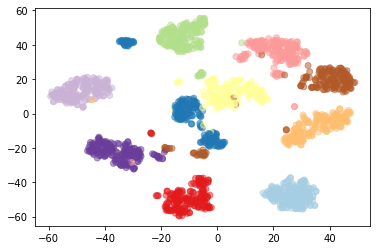

In [51]:
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.5, c=y, cmap=plt.cm.Paired);